In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("./line.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [2]:
masks = [
    np.array([[-1, -1, -1],
              [2, 2, 2],
              [-1, -1, -1]]),
    np.array([[-1, 2, -1],
              [-1, 2, -1],
              [-1, 2, -1]]),
    np.array([[-1, -1, 2],
              [-1, 2, -1],
              [2, -1, -1]]),
    np.array([[2, -1, -1],
              [-1, 2, -1],
              [-1, -1, 2]])
]

def apply_mask(image, mask):
    filtered_image = np.zeros_like(image)
    height, width = image.shape
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            region = image[i-1:i+2, j-1:j+2]
            value = np.sum(region * mask)
            filtered_image[i, j] = np.clip(value, 0, 255)
    return filtered_image

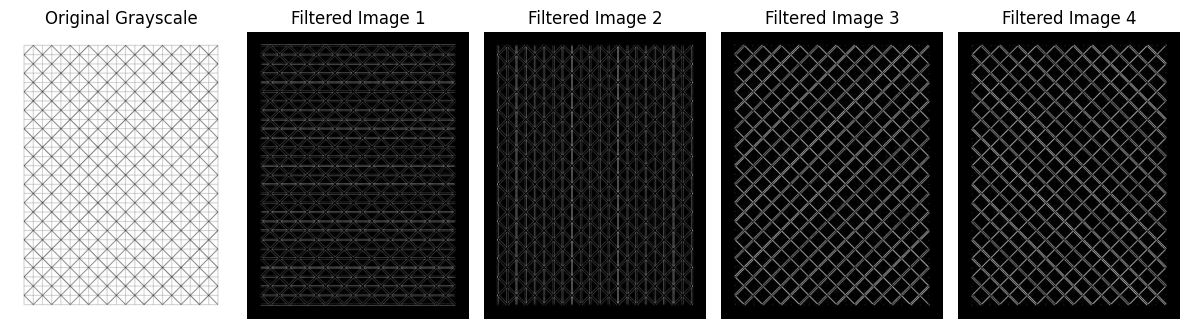

In [6]:
filtered_images = [apply_mask(image, mask) for mask in masks]
fig, axes = plt.subplots(1, 5, figsize=(12, 6))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Grayscale")
axes[0].axis('off')

# Filtered images
for ax, filtered_image, mask_index in zip(axes[1:], filtered_images, range(1, 5)):
    ax.imshow(filtered_image, cmap='gray')
    ax.set_title(f"Filtered Image {mask_index}")
    ax.axis('off')

plt.tight_layout()
plt.show()